'''
Github: https://github.com/ahkiyani
Linkedin: https://www.linkedin.com/in/amirhossein-kiyani1381
G-mail: https://amirho3einkiyani.2002@gmail.com
'''

'''
فایل کلی
Main file
فایل نهایی که در آن از کلیه ی پیش نیازها استفاده میشود و اجرای آن باید بی نقص باشد
Final file that uses the all prerequisites and its running must be perfect
'''

#برنامه ها و ماژول های موردنیاز
# 1.download.exe
# 2.file{file_csv , file_json , file_excel , file_to_excel , pdf_report}
# 3.clean_data{normal , raw , clear , correlation} 4.visual{chart , feature_charts}
# 5.dTree{dTree}

In [2]:
from prq.file import file_csv , file_to_excel , pdf_report
from prq.clean_data import normal , raw , clear , correlation
from prq.visual import chart , feature_charts
from prq.dTree import dTree
#**********************************************************#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

'''انتخاب و دانلود داده'''
#run download.exe

In [3]:
'''خواندن فایل'''
df = file_csv('prq/downloads/data.csv' , 0)

'''نگاه به شمای کلی داده'''

In [4]:
'''نامگذاری ویژگی ها و نرمالسازی آنان'''
X = df[['Age','Sex' , 'BP' , 'Cholesterol' , 'Na_to_K']].values
drug = {'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'drugY':4}
classifier = df['Drug'].map(drug)
classifier = normal(classifier, to='num', fillna_method='mode')
classifier = classifier.astype(str)
sex = {'M': 0, 'F': 1}
X[:,1] = pd.Series(X[:,1]).map(sex)
bp = {'LOW': 0, 'NORMAL': 1 , 'HIGH':2}
X[:,2] = pd.Series(X[:,2]).map(bp)
chol = {'NORMAL':0 , 'HIGH':1}
X[:,3] = pd.Series(X[:,3]).map(chol)
cdf = pd.DataFrame(X , columns=df.columns[:5] , dtype=float)
#print(cdf)
cdf['Age'] =normal (cdf['Age'] , 'num' , 'mode')
cdf['Sex'] = normal(cdf['Sex'] , 'num' , 'mode')
cdf['BP'] = normal(cdf['BP'] , 'num' , 'mode')
cdf['Cholesterol'] = normal(cdf['Cholesterol'] , 'num' , 'mode')
cdf['Na_to_K'] = normal(cdf['Na_to_K'] , 'num' , 'mean')

'و سپس نتیجه گیری'

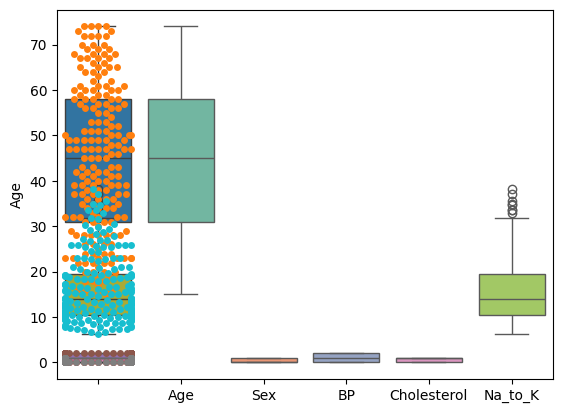

In [5]:
'''شروع پیش پردازش'''
'''تحلیل داده خام و نمودارهای آن و بررسی نویزها'''
raw(cdf)
'''و سپس نتیجه گیری'''

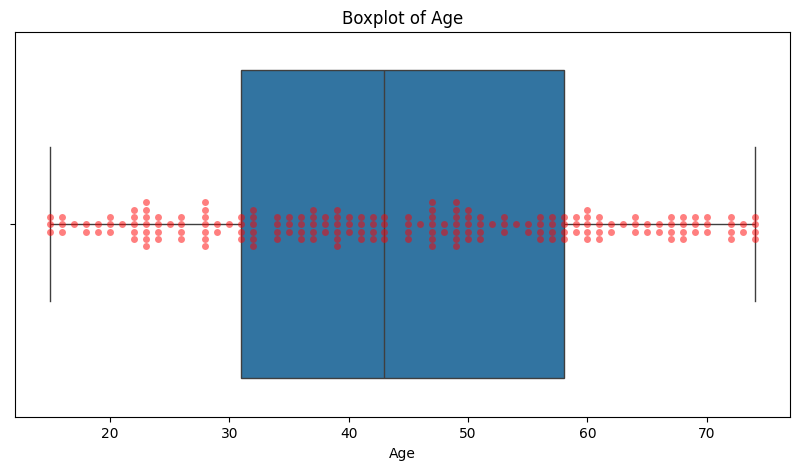

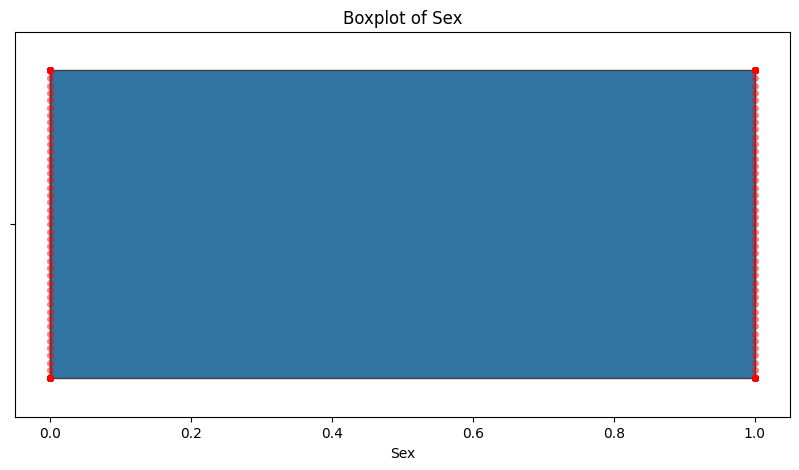

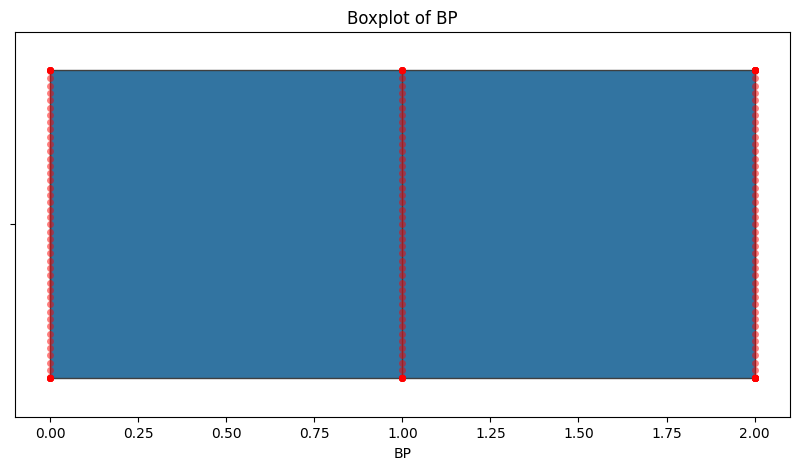

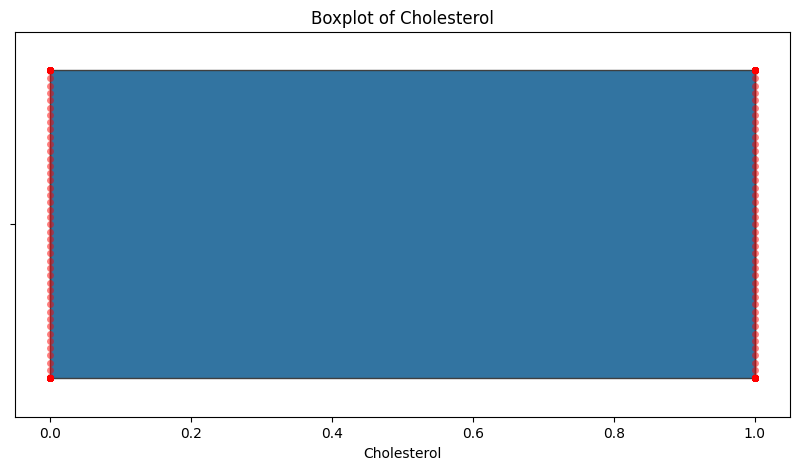

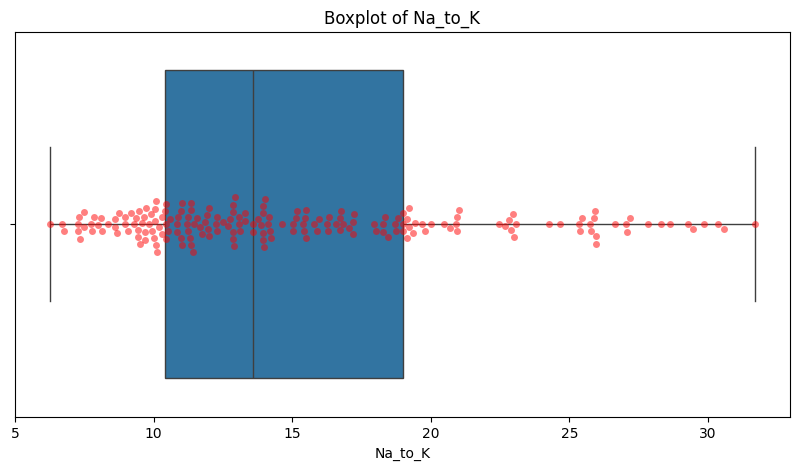

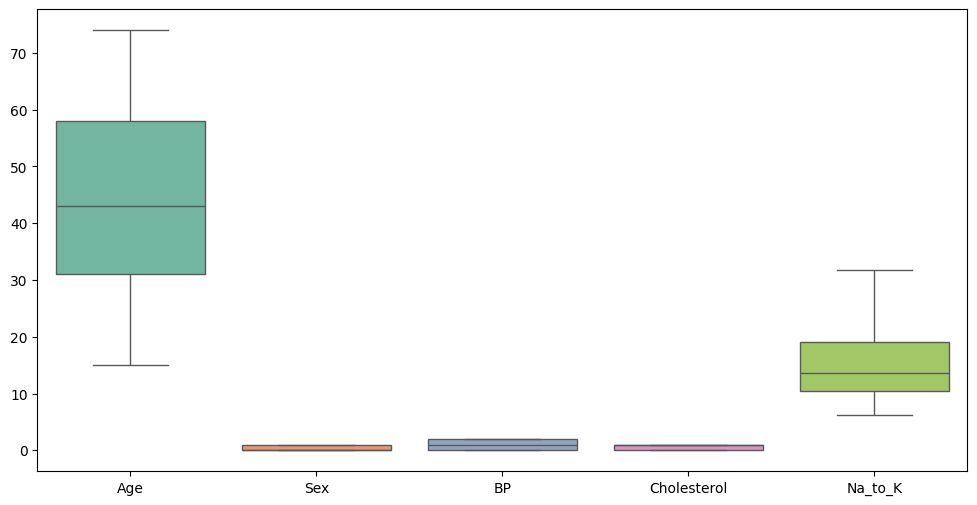

In [6]:
'''پاکسازی داده و حذف نویزها ، تکراری ها و درصورت نیاز حذف خالی ها یا پر کردن آنان با مقادیر منطقی'''
cdf = clear(cdf , 'n')
file_to_excel(cdf , 'clean_data.xlsx')

In [7]:
'''بررسی هم بستگی و هیت مپ هم بستگی'''
correlation(cdf)

WARNING	Thread(Thread-3 (run)) Task(Task-5) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


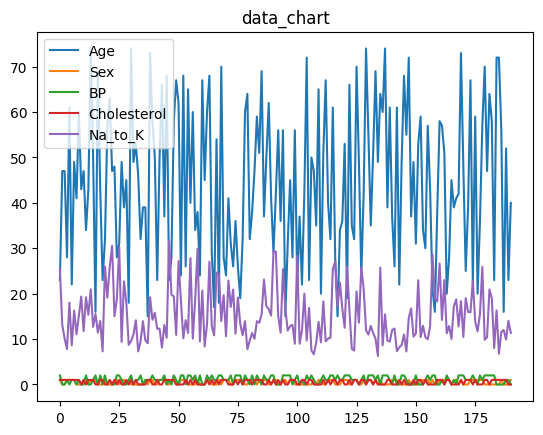

WARNING	Thread(Thread-10 (run)) Task(Task-114) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


In [8]:
'''رسم نمودار'''
chart(cdf)
feature_charts(cdf)

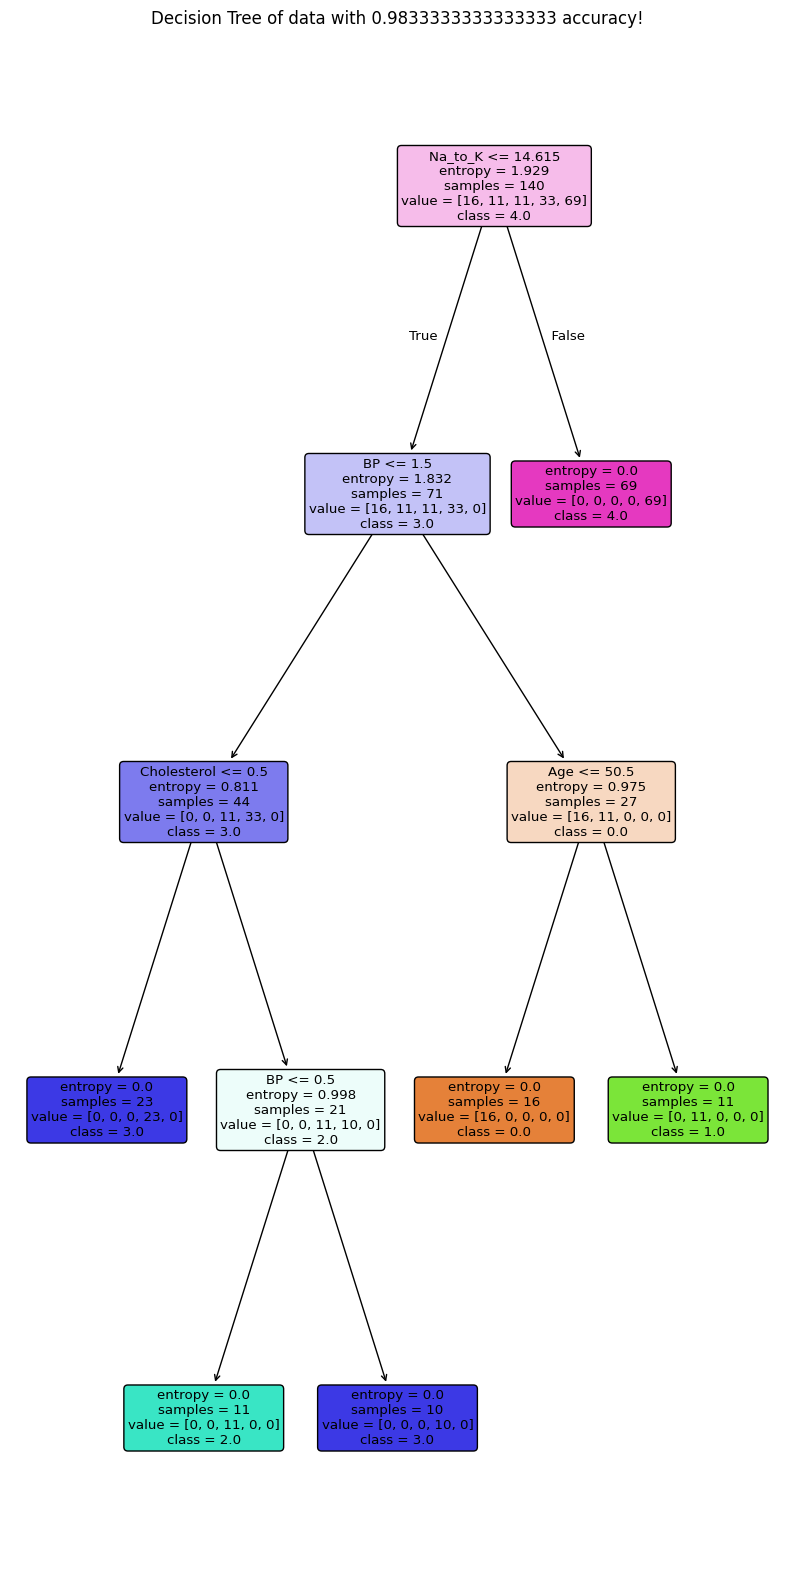

'نتیجه گیری نهایی'

In [9]:
'''درخت تصمیم'''
dTree(df , X , classifier , 'entropy' , 5)
'''نتیجه گیری نهایی'''

In [10]:
'''ارائه گزارش در غالب فایل پی دی اف'''
#محتوا شامل تمام متن های نتیجه گیری، گزارشات و نمودارها
content = [
    ('text' , 'به نام خداوند دانش و پویایی') ,
    ('text','داده کاو: امیرحسین کیانی'),
    ('text','موضوع: تحلیل فروش یک شرکت دانش بنیان'),
    ('text','Data miner: AmirHossein Kiyani'),
    ('text' , 'GITHUB: https://github.com/ahkiyani'),
    ('text' , 'LINKEDIN: https://www.linkedin.com/in/amirhossein-kiyani1381'),
    ('text', 'G-MAIL: https://amirho3einkiyani.2002@gmail.com'),
    ('text','Topic: Analysis of a Drug'),
    ('text' , 'مراحل کار قدم به قدم:') ,
    ('text' , '1.دانلود فایل داده بوسیله برنامه دانلودر'),
    ('text' , '2.خواندن و ذخیره فایل بصورت دیتافریم برای انجام پیش پردازش...'),
    ('text' , '3.نگاه به شمای کلی داده: داده درمورد ویژگی آدمها و بیماران و میزان کلسترول،'),
    ('text' , 'فشار خون و سدیم پتاسیم و داروی پیشنهادی هست'),
    ('text' , '4.باتوجه به داده ها نیاز به درخت تصمیم هستش و اینکه تشخیص بدیم چه دارویی برای چه کسی مناسبه؟'),
    ('text' , '5.پیش پردازش شامل حذف داده های تکراری، تصحیح داده های خطا و پیش بینی داده های گم شده '),
    ('text','6.نامگذاری ویژگی ها و نرمالسازی آنان'),
    ('text' ,'7.تحلیل داده خام و نمودارهای آن و بررسی نویزها'),
    ('image' , 'raw_Age.png' , 'سن خام'),
    ('image' , 'raw_BP.png' , 'فشارخون خام'),
    ('image' , 'raw_Cholesterol.png' , 'کلسترول خام'),
    ('image' , 'raw_Na_to_K.png' , 'سدیم پتاسیم خام'),
    ('image' , 'raw_Sex.png' , 'جنسیت خام'),
    ('image' , 'raw_features' , 'کل داده خام'),
   ('text' , 'فقط فیچر سدیم پتاسیم دارای نویز است!'),
   ('text' , '8.پاکسازی داده و حذف نویزها ، تکراری ها و درصورت نیاز حذف خالی ها یا پر کردن آنان با مقادیر منطقی') ,
    ('image' , 'clear_Age.png' , 'سن پاکسازی شده'),
    ('image' , 'clear_BP.png' , 'فشارخون پاکسازی شده'),
    ('image' , 'clear_Cholesterol,png' , 'کلسترول پاکسازی شده'),
    ('image' , 'clear_Na_to_K.png' , 'سدیم پتاسیم پاکسازی شده'),
    ('image' , 'clear_Sex.png' , 'جنسیت پاکسازی شده'),
    ('image' , 'clear_features' , 'کل داده پاکسازی شده'),
   ('text' , '9.بررسی هم بستگی و هیت مپ هم بستگی'),
    ('image' , 'features_correlation.png' , 'هیت مپ هم بستگی فیچرها'),
   ('text' , 'باتوجه به هم بستگی نمیتوان نتیجه دقیقی گرفت چون هم  بستگی مفیدی وجود ندارد'),
   ('text' , '10.رسم نمودار کلی از داده'),
    ('image' , 'data_chart.png' , 'نمودار کلی داده'),
   ('text' , '11.رسم نمودار سه تایی برای تک تک فیچرها'),
    ('image' , 'Age_three_charts.png' , 'سن'),
    ('image' , 'BP_three_charts.png' , 'فشارخون'),
    ('image' , 'Cholesterol_three_charts.png' , 'کلسترول'),
    ('image' , 'Na_to_K_three_charts.png' , 'سدیم پتاسیم'),
    ('image' , 'Sex_three_charts.png' , 'جنسیت'),
    ('text','با استفاده از درخت تصمیم و مدل سازی با روش آنتروپی سعی میکنیم'),
    ('text' , 'تشخیص دهیم در چه مواردی کدام داروها باید تجویز شوند:'),
    ('image' , 'Decision_Tree.png' , 'درخت تصمیم با دقت تقریبا 98درصدی'),
    ('text' , 'داروی نوع پنجم برای همه بیماران علی الخصوص کسانی که سدیم پتاسیم بیشتر از 14.6 دارند!'),
    ('text' , 'داروی نوع چهارم برای تمام بیماران با سدیم پتاسیم کمترمساوی 14.6'),
    ('text' , 'و کسانی که فشارخون کمتر از 1.5 و کلسترول کمتر از 0.5'),
    ('text' , 'و کسانی که فشارخون بیشتر از 0.5 و کلسترول بیشتر از 0.5 دارند!'),
    ('text' , 'داروی نوع سوم برای تمام کسانی که سدیم پتاسیم زیر 14.6 ، فشارخون کمتر از 1.5 و کلسترول بیشتر از 0.5 دارند!'),
    ('text' , 'داروی نوع اول برای کسانی که سدیم پتاسیم کمتر از 14.6 و سن کمتر از 50 دارند!'),
    ('text' , 'داروی نوع دوم برای کسانی که سدیم پتاسیم کمتر از 14.6 و سن بیشتر از 50 دارند!'),
    ('text' , 'تمام!'),
    ('image' , 'prq/ahkiyani.png' , 'امیرحسین کیانی'),
    ('text' , 'Github: https://github.com/ahkiyani'),
    ('text' , 'Linkedin: https://www.linkedin.com/in/amirhossein-kiyani1381'),
    ('text' , 'G-mail: https://amirho3einkiyani.2002@gmail.com')
]
fontfa = 'prq/font/BYas.ttf'
fonteng = 'prq/font/LSANS.ttf'
pdf_report('final_reoprt.pdf' , content , fontfa , fonteng)

PDF saved as final_reoprt.pdf


'''
Github: https://github.com/ahkiyani
Linkedin: https://www.linkedin.com/in/amirhossein-kiyani1381
G-mail: https://amirho3einkiyani.2002@gmail.com
'''